The purpose of this document is to track what issues are important to the public over time, for two reasons 
1) it will be interesting to see how the relative salience of an issue shapes its position in a belief network
2) it might be desirable to keep the average salience of the network constant across the years

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

# Victor's loc: "C:/Users/vicvi/big-datasets/social_values"
anes_dir = "C:/Users/vicvi/big-datasets/social_values"
anes_file = os.path.join(anes_dir, "anes_timeseries_cdf_csv_20220916", "anes_timeseries_cdf_csv_20220916.csv")

In [13]:
# load the ANES csv file
full_df = pd.read_csv(anes_file)
full_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,8,9,13,14,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,233,254,275,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,36

Version  VCF0004  VCF0006  VCF0006a VCF0009x VCF0010x  \
0  ANES_CDF_VERSION:2022-Sep-16     1948     1001  19481001        1        1   
1  ANES_CDF_VERSION:2022-Sep-16     1948     1002  19481002        1        1   
2  ANES_CDF_VERSION:2022-Sep-16     1948     1003  19481003        1        1   
3  ANES_CDF_VERSION:2022-Sep-16     1948     1004  19481004        1        1   
4  ANES_CDF_VERSION:2022-Sep-16     1948     1005  19481005        1        1   

  VCF0011x VCF0009y VCF0010y VCF0011y  ...  VCF9272  VCF9273  VCF9274 VCF9275  \
0        1        1        1        1  ...                                      
1        1        1        1        1  ...                                      
2        1        1        1        1  ...                                      
3        1        1        1        1  ...                                      
4        1        1        1        1  ...                                      

  VCF9277  VCF9278  VCF9279 VCF9280 VCF9281 VCF9282  
0                                                    
1                                                    
2                                                    
3                                                    
4                                                    

[5 rows x 1030 columns]

In [55]:
# trim the dataframe to only contain the "most important issue" question
trimmed_df = full_df.loc[:,["VCF0004", "VCF0875", "VCF0875a", "VCF0875b"]]
trimmed_df.head()

VCF0004 VCF0875 VCF0875a VCF0875b
0     1948                          
1     1948                          
2     1948                          
3     1948                          
4     1948

In [56]:
# replace spaces with nan values for missing ones
trimmed_df = trimmed_df.replace(" ", np.nan)
trimmed_df.count()

VCF0004     68224
VCF0875     36506
VCF0875a     9812
VCF0875b    26694
dtype: int64

In [57]:
# make all the values integers (codes for important issues should be integers)
trimmed_df["VCF0875"] = pd.to_numeric(trimmed_df["VCF0875"], downcast="integer")

In [106]:
# group the dataframe by year and count the values of the different responses
# note that I eliminate "No issues" (0), "Don't know" (98), and "No answer" (99) from the denominator
important_issue_ct = trimmed_df.groupby(["VCF0004"])["VCF0875"].value_counts().unstack(fill_value=0)
important_issue_trimmed = important_issue_ct.loc[:,[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 97.0]]

important_issue_pt = important_issue_trimmed.div(important_issue_trimmed.sum(axis=1), axis=0)
important_issue_pt

VCF0875      1.0       2.0       3.0       4.0       5.0       6.0       7.0   \
VCF0004                                                                         
1960     0.062559  0.082464  0.623697  0.003791  0.021801  0.001896  0.000948   
1964     0.023346  0.080934  0.374319  0.029572  0.007782  0.003113  0.036576   
1966     0.004195  0.151007  0.563758  0.035235  0.014262  0.004195  0.031879   
1968     0.009229  0.063942  0.502966  0.017139  0.005274  0.001978  0.185893   
1970     0.009675  0.132688  0.355218  0.025570  0.008984  0.049758  0.197650   
1972     0.000000  0.213082  0.333994  0.045590  0.000991  0.027750  0.193261   
1974     0.017693  0.672346  0.048493  0.091088  0.004587  0.009830  0.066186   
1976     0.007416  0.443240  0.050770  0.037650  0.004564  0.014832  0.081004   
1978     0.002783  0.725417  0.073748  0.032931  0.004174  0.007885  0.051020   
1980     0.003698  0.463757  0.320266  0.024408  0.000740  0.021450  0.014793   
1982     0.012546  0.251661  0.215498  0.019188  0.000738  0.002214  0.025092   
1984     0.010039  0.337423  0.332404  0.023424  0.002789  0.011154  0.040156   
1986     0.028095  0.252857  0.265714  0.036190  0.000952  0.010952  0.135238   
1988     0.006607  0.391592  0.096697  0.015616  0.001201  0.049249  0.207207   
1990     0.001690  0.251831  0.349296  0.027606  0.000563  0.065915  0.127887   
1992     0.002616  0.423862  0.031397  0.021455  0.000523  0.016745  0.118263   
1994     0.000000  0.188568  0.048321  0.040660  0.000000  0.012375  0.383029   
1996     0.000000  0.201799  0.043702  0.037275  0.000000  0.025707  0.285347   
1998     0.006040  0.136324  0.106126  0.109577  0.000000  0.005177  0.209664   
2000     0.000000  0.152523  0.112385  0.051606  0.001147  0.026376  0.222477   

VCF0875      8.0       9.0       97.0  
VCF0004                                
1960     0.054028  0.146919  0.001896  
1964     0.199222  0.240467  0.004669  
1966     0.078859  0.111577  0.005034  
1968     0.088991  0.119314  0.005274  
1970     0.050449  0.167934  0.002073  
1972     0.064420  0.106046  0.014866  
1974     0.003932  0.073394  0.012451  
1976     0.007986  0.346264  0.006275  
1978     0.006030  0.094620  0.001391  
1980     0.000740  0.147929  0.002219  
1982     0.000738  0.471587  0.000738  
1984     0.003904  0.231456  0.007250  
1986     0.005714  0.260476  0.003810  
1988     0.008408  0.218619  0.004805  
1990     0.005070  0.169014  0.001127  
1992     0.012559  0.369963  0.002616  
1994     0.007071  0.318798  0.001179  
1996     0.029563  0.375321  0.001285  
1998     0.036238  0.390854  0.000000  
2000     0.010321  0.422018  0.001147

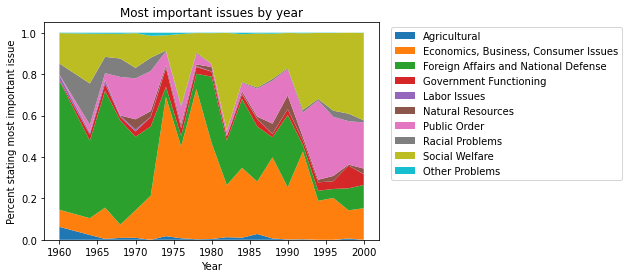

In [111]:
# plot relative issue importance over time
correspondence = {
    1: "Agricultural",
    2: "Economics, Business, Consumer Issues",
    3: "Foreign Affairs and National Defense",
    4: "Government Functioning",
    5: "Labor Issues",
    6: "Natural Resources",
    7: "Public Order",
    8: "Racial Problems",
    9: "Social Welfare",
    97: "Other Problems"
}

labels = [correspondence[i] for i in important_issue_pt.columns]
plt.stackplot(important_issue_pt.index, np.array(important_issue_pt.T), labels=labels)
plt.xlabel('Year')
plt.ylabel('Percent stating most important issue')
plt.title('Most important issues by year')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

In [ ]:
# so what should the weightings be on each variable so that the "average salience" remains constant over time?
# 1. bin the years into as many groups as I have categories -- this is so I have the same number of variables as I have unknowns
# 2. take the average of each bin for each category, and then make a matrix where s_ij is the strength of issue j in bin i
# 3. solve the system of linear equations for w_j so that Sw = 1. Oh but the issue is that I need 

In [ ]:
# these are the codes of the most important problem question from years after 2000
var_names = {
    "2000": "V000436",
    "2004": "V045238", # CODES DOCUMENTED — this is "over the past four years"
    "2008": "V085178", # CODES NOT DOCUMENTED — this is in the CSES module
    "2012": "mip_mostproblem", # CODES NOT DOCUMENTED
    "2016": "V162122", # CODES NOT DOCUMENTED
    "2020": "V202211" # CODES NOT DOCUMENTED
}

# dead darlings

In [ ]:
# meant to fetch the issue importances from later years — but much of it is not coded
dfs = []
for key, val in var_names.items():
    filename = os.path.join(anes_dir, f"anes_{key}", f"anes_{key}_dat.txt")
    df = pd.read_csv(filename)
    trimmed_df = df.loc[:, [var_names[key]]]
    trimmed_df["year"] = key
    trimmed_df = trimmed_df.rename(columns={var_names[key]: 'most_impt_issue'})
    dfs.append(trimmed_df)
    
combined_df = pd.concat(dfs)